TODOs
- [x] include some callback functionality from fastai
- [ ] add further resources 
- [ ] ~decide on appendix content~
- [x] check consistency of deep learning vs deep-learning
- [ ] check all headings make sense
- [ ] check that headings are at a suitable level 
- [ ] make sure images use the PH syntax 
- [ ] use of back ticks \`\` is consistent
- [ ] cite: https://hcommons.org/deposits/item/hc:32415/, https://doi.org/10.1093/llc/fqy085, 

---
title: YOUR TITLE HERE
collection: lessons
layout: lesson
slug: LEAVE BLANK
date: LEAVE BLANK
translation_date: LEAVE BLANK
authors:
- FORENAME SURNAME 1
- FORENAME SURNAME 2, etc
reviewers:
- LEAVE BLANK
editors:
- LEAVE BLANK
translator:
- FORENAME SURNAME 1
- FORENAME SURNAME 2, etc
translation-editor:
- LEAVE BLANK
translation-reviewer:
- LEAVE BLANK
original: LEAVE BLANK
review-ticket: LEAVE BLANK
difficulty: LEAVE BLANK
activity: LEAVE BLANK
topics: LEAVE BLANK
abstract: LEAVE BLANK
---

{% include toc.html %}

# An introduction to deep learning based computer vision methods for humanities research 

### Lesson goals

This lesson aims to:
- provide an introduction to deep learning based computer vision methods for humanities research 
- give an overview of the steps involved in training a deep learning model
- discuss some of the specific considerations around using deep learning/computer vision for humanities research
- help you decide whether deep learning might be a useful tool for you

This lesson doesn't aim to:
- reproduce other more generic introductions to deep learning, though it does cover *some* of the same material 
- cover every detail of deep learning and computer vision, though the lesson doesn't try and 'hide' anything, it also won't cover all topics in proper detail. 

### Suggested Prior Skills

- Some familiarity with Python or another programming language will be helpful for following the lesson fully. If you are not familiar with Python it may be useful to follow the Programming Historian [lessons](https://programminghistorian.org/en/lessons/?topic=python) on Python before starting this lesson. Specifically it would be beneficial to understand how to use variables, indexing and some familiarity with using methods from external libraries. 
- Some familiarity with using [Jupyter Notebooks](https://jupyter.org/try) will also be advantageous. If you are unfamiliar with notebooks you may find the [introduction to Jupyter Notebooks](https://programminghistorian.org/en/lessons/jupyter-notebooks) Programming Historian lesson a helpful resource in conjunction with this lesson. 
- There is some use of external Python libraries in this tutorial but previous knowledge of these libraries isn't necessary. The steps involved in using these libraries will be explained as they are used. 

## Introduction: why use deep learning for computer vision in the humanities?
!todo
- what it can do 
- why you might want to do it 
- Historical application
- working at scale
- previous works
- some intro to concerns/challenges?


## Setup instructions

- !todo finalize setup instructions 
- !todo explain why we don't recommend a local setup 
### Kaggle (preferred option) 
- sign up for a kaggle account 
- go to !todo add link 
- Kaggle notebook has been setup to provide data/correct python instalation + some free GPU allocation 
- you can fork your notebook to make changes etc. 

### Colab (supported)
- Google account required 
- Overview of Google Colab features [https://colab.research.google.com/notebooks/basic_features_overview.ipynb]
- One additional cells at top of colab nb with pinned pip installs and data download/setup 

### alternative cloud setups (not supported) 
- brief instructions of the environment setup required with conda + nvidia gpu
- can't support all of the various cloud offerings but some help can be found here
- git clone repo will contain all the data !todo double check this + 

### Local setup 
- Conda environment 
- git clone repo will contain all the data !todo double check this + 

## How this lesson is organised

This structure of this lesson may follow a different order to what you expect. Instead of starting from the 'ground up', this lesson starts from practical applications of the whole deep learning pipeline before drilling down into more detail of *parts* of this pipeline. This is done for a number of reasons:

- when starting with the fundamentals it can be hard to understand how the different pieces of a topic fit together, and which are most important to understand for practical applications

- there is the danger of '[“learning about” something at the expense of actually learning it'](https://www.gse.harvard.edu/news/uk/09/01/education-bat-seven-principles-educators), although there is a theoretical component to this lesson, we want to get you started in using deep learning based methods. 

- you might want to use deep learning as a tool that supports your work but doesn't underpin research findings directly, arguably this may justify a lower investment in knowing all the details of how a tool works. [^1]

Instead of covering every detail, this lesson focuses on the most important things to be aware of and control when you are getting started. Since the aim of this lesson is to focus on using computer vision with humanities applications in mind, we focus on questions of particular importance to humanities *applications* of these methods. 
There may be a need to go beyond this level of detail at a later stage but this will then be driven by a particular concrete need or interest rather than learning something which may not help you apply computer vision in your work. Since there are already a plethora of very good deep learning tutorials, courses and books available it is felt that this focus on the humanities application of these methods will be more useful than a generic introduction to the topic of which there are already many examples freely available. 

If you need to learn more about some of the specific fundamentals there are a range of resources available; some suggestions are made in the resources section at the end of this lesson. 

## Machine learning

Before moving to the first practical example, it might be useful to briefly review what is meant by 'machine learning'. Machine learning aims to allow computers to 'learn' from data instead of being explicitly programmed to do something. For example, if we want to filter out spam emails there are a few different approaches we could take. One approach could be to read through examples of 'spam' and 'non-spam' emails to see if we can identify any [signals](https://en.wikipedia.org/wiki/Signal) which indicate that an email is spam. We might, for example, come up with a list of keywords which we think will be likely to indicate spam. Once we have done this we could write a program that does something like this for each email received:

```
count number spam_words in email:
    if number spam_words >= threshold:
        email = spam
```

In contrast, a machine learning approach would instead expose a machine learning [algorithm](https://en.wikipedia.org/wiki/Algorithm) to labeled examples of emails which are 'spam' or 'not spam'. This algorithm would over repeated exposure to examples 'learn' patterns which indicate whether an email is spam or not. This is an example of ['supervised learning'](https://en.wikipedia.org/wiki/Supervised_learning), in which an algorithm is exposed to labeled data.  This is the type of machine learning which this tutorial will focus on. There are different approaches to the managing the 'learning' process, some of which we will cover in this lesson. 

There are advantages and disadvantages to using machine learning. Some advantages in our email example include avoiding having to manually identify what indicates if an email is spam or not. This is particularly useful when these signals might be subtle or hard to detect. If spam emails change in the future you don't need to rewrite your entire program but can instead train your model with new examples. Some disadvantages include the requirement for labeled examples which can be time consuming to create. One major limitation of some machine learning algorithms is that it can be difficult to understand how they made a decision i.e. why an email was labeled spam or not. The implications of this vary depending on how much 'power' the algorithm is given in a system, something which will be returned to at the end of this lesson. 

Deep learning is an approach to machine learning, which has been increasingly used for a broad range of tasks. We will cover deep learning in much more detail later in this lesson, for now we can treat "machine learning" and "deep learning' as roughly the same thing.  

## Training a classification model 

Now we have got a very general overview of machine learning, we'll move to our first example of using deep learning for computer vision. In this example we will build an image classifier. This classifier will learn to assign images to one of two categories based on labeled training data. 

### The data: classifying images from historical newspapers 

In this tutorial we will work with a dataset that is derived from the ["Newspaper Navigator" dataset](https://news-navigator.labs.loc.gov/). This is a dataset of extracted visual content for 16,358,041 historic newspaper pages drawn from the Library of Congress [Chronicling America collection](https://chroniclingamerica.loc.gov/about/). 

The Newspaper Navigator data was created using an [object detection](https://en.wikipedia.org/wiki/Object_detection) deep learning model. This model was trained on annotations of World War 1-era Chronicling America pages, including annotations made by volunteers as part of the Beyond Words crowdsourcing project. These annotations include a 'bounding box' around images, along with information about the type of image is contained within that bounding box. This object detection model was trained on this data and subsequently used to make predictions across the whole Chronicling America collection. The model extracts images from the page and classifies them into *one* of seven categories (outlined below). 

If you want to find out more information about how this dataset was created you may want to read the [journal article](https://arxiv.org/abs/2005.01583) describing this work, or look at the [GitHub repository](https://github.com/LibraryOfCongress/newspaper-navigator) which contains the code and training data We won't be replicating this object detection model in this lesson, instead we will use the output of this model as the starting point for creating the data we use in this tutorial. 

#### Understanding errors in the data 

It is important to understand the data you are working with both as a historian and when applying deep learning. Since the data from Newspaper Navigator is predicted by a machine learning model it will contain errors. It is important to therefore know how precise the model was. The project page for Newspaper Navigator prominently shares the precision results of each category:

| Category | Average Precision | # in Validation Set |
| ----- | ----------------- | ----------------- |
| Photograph | 61.6\% | 879 |
| Illustration | 30.9\% | 206 |
| Map | 69.5\% | 34 |
| Comic/Cartoon | 65.6\% | 211 |
| Editorial Cartoon | 63.0\% | 54 |
| Headline | 74.3\% | 5,689 |
| Advertisement | 78.7\% | 2,858 |
| Combined | 63.4\% | 9,931 |

[Reference](https://github.com/LibraryOfCongress/newspaper-navigator/blob/master/README.md)

The precision score varies across image type with some classes of image performing better than others. The question of how good is 'good enough' will depend on the intended use of these models. Working with some errors is (usually) a requirement of working with machine learning since (most) models will produce some errors. It is helpful that the performance of the model is shared in the [GitHub repository](https://github.com/LibraryOfCongress/newspaper-navigator) for this work. This is something we will also want to do when we share data or research findings generated via machine learning methods. 

## Classifying newspaper advertisements 

For our first application of deep learning we'll focus on classifying images predicted as adverts (remember this data is based on predictions and will contain some errors). More specifically, we'll work with a subset of the ads data sampled covering the years 1880-1885. The code for generating this sample can be found at 
!TODO add link. 

#### Detecting visual content in adverts  n 
If you look through the advert images, you will see that some of the adverts contain only text, whilst others have some kind of illustration in the advert. For example: 

!todo update figs for ph format


<img src="figs_deeplearning/visual_ad.jpg" width="200">
<img src="figs_deeplearning/text_ad.jpg" width="200">

Our classifier will be trained to predict which category an advert image belongs to. We might use this classifier to help automate finding adverts with images for further 'manual' analysis. Alternatively we may use this classifier more directly to help perform research by allowing us to quantify how many adverts contained illustrations for a given year, and if this changed over time, or based on other properties of the newspaper like place of publication. The type of usage will impact on how we assess our model and the labels, this is an issue we'll dig into later in the lesson. 

## Creating an image classifier 

Now we we have defined the goal we want to try to tackle with deep learning, we'll move to developing the code for this task. There are a number of ways we could do this. The Python programming language provides all the functionality we would need to develop code to tackle this problem from scratch, however we'll almost always want to tackle a computer vision problems by building on top of an existing framework or software library. These libraries will allow you to tackle your problem with much less code compared to creating a solution from scratch and will also be much more efficient and likely to contain less bugs. 

Some libraries/frameworks for deep learning with Python interfaces include include; [Keras](https://keras.io/), [Tensorflow](https://www.tensorflow.org/), [Pytorch](https://pytorch.org/), and [fastai](fast.ai). These libraries have slight different features and aims but all of them implement some of the common building blocks of deep learning. There are advantages and disadvantages to all of these frameworks with some being more suited for particular tasks.  In this lesson we will use fastai. 

#### What is fastai?

In this lesson we will work with [fastai (version 2)](http://docs.fast.ai/). fastai is a Python library for deep learning ["which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches"](https://arxiv.org/abs/2002.04688). The library is developed by [fast.ai](https://www.fast.ai/about/) (notice the dot!). fastai is a research organisation that aims to make deep learning more accessible. Alongside the fastai library, fast.ai also organises free courses and carries out research. 

There are a few reasons why fastai was chosen for this tutorial: 

- it is focused on making deep learning accessible, both in the API to the library but also in implementing techniques that limit the requirements for large amount of data or computational resources 
- many best practices are implemented as 'defaults', helping achieve good results
- there are different levels at which you can interact with the library depending on how much you need to change lower level details
- the library sits on top of Pytorch which makes it relatively simple to use existing Pytorch code. 

Although this tutorial focuses on fastai many of the techniques shown are applicable across other frameworks too. 

### Creating an image classifier in fastai
The next section will outline the steps involved in creating and training a classification model to predict whether an advert is text only or also contains an illustration. These steps will be covered fairly quickly don't worry if you feel you are not following everything in this section, the lesson will get back to what is happening in more detail later. 

The first step is to import the required modules from the fastai library, in this case we import ```vision.all``` since we are working on a computer vision task.

In [ ]:
from fastai.vision.all import *

<div class="alert alert-warning">
 Using star imports is generally discouraged in Python. However, fastai uses <a href="https://docs.python.org/3.5/tutorial/modules.html#importing-from-a-package">__all__</a> to provide a list of packages that should be imported when using star import. This approach is useful for exploratory work but you may still want to change your imports to be more explicit. 
</div>

We will also import [Matplotlib](https://matplotlib.org/) a 'comprehensive library for creating static, animated, and interactive visualizations in Python.' We will ask Matplotlib to use a different [style](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) using the `style.use` method. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#### Loading the data 

There are a number of ways in which data can be loaded using the fastai library. The advert data consists of a folder which contains the image files, and a CSV file which contains a column with paths to the images, and the associated label:

| file | label |
|----|----|
| kyu_joplin_ver01_data_sn84037890_00175045338_1900060601_0108_007_6_97.jpg | text-only |

There are various ways in which we could load this type of data using `fastai`. In this example we'll use `ImageDataLoaders.from_csv`. As the name suggests the `from_csv` method of `ImagDataLoaders` loads data from a CSV file. We need to tell fastai a few things about how to load the data to use this method:

- the path to the folder where images and CSV file are stored
- the coloumns in the CSV file which contain the labels 
- one 'item transform' ```Resize()``` to resize all the images to a standard size.

We will go into  more detail later in the lesson. We'll create a variable `ad_data` which will be used to store the steps for loading this data:

In [ ]:
ad_data = ImageDataLoaders.from_csv( 
    path="ads_data/", # root path to csv file and image directory
    csv_fname="ads_upsampled.csv/", # the name of our csv file
    folder="images/", # the folder where our images are stored
    fn_col="file", # the file column in our csv
    label_col="label", # the label column in our csv
    item_tfms=Resize(224), # resize images so they are all 224 by 224 pixels
    seed=42, # set a fixed seed to make results more reproducible
)

It is important to make sure that data has been loaded correctly. One way to check this quickly is to use `show_batch()` method on our data. This will display the images and the associated labels for a sample of our data.  

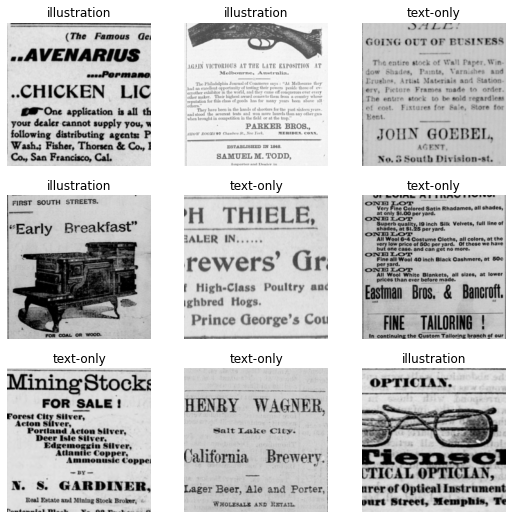

In [ ]:
ad_data.show_batch()

You can see here that the labels have been associated correctly with the labels we want to classify these images into, in this case ```text-only``` and ```illustration```. This is a useful way of checking that your labels and data have been loaded correctly. 

### Creating the model

Now that fastai knows how to load the data the next step is to create a model which will be trained on this data. To create a model suitable for computer vision we will use a function `cnn_learner`. To use this function you need to pass (at a minimum):

- the data the model will use as training data 
- the type of model architecture you want to use 

This is already sufficient for creating a computer vision model in fastai but you will usually also want to pass some metrics you want to track during training. This will allow you to get a better sense of how well your model is performing on the task you are training it on. In this example we'll use `accuracy` at the metric. 

Let's create this model and assign it to a new variable `learn`

In [ ]:
learn = cnn_learner(ad_data, # the data the model will be trained on
                    resnet18, # the type of model we want to use 
                    metrics=accuracy # the metrics to track
                   )

### Training the model 
Although we have created a `cnn_learner` model, we haven't actually trained the model yet. This is done using a `fit` method. There are different ways we can now train (fit) this model. To start with, we'll use the```fine_tune``` method. In this example the only thing we'll pass to the fine tune method is the number of epochs to train the model for. The amount of time the model takes to train will depend on where you are running this code and the resources available. Again, we will cover the details of all of these components below!

In [ ]:
learn.fine_tune(10)

When you run this method you will see a progress bar showing how long the model has been training and the estimated remaining time, alongside a table which displays some other information about the model, this includes our tracked metric, accuracy. You can see that in this example we got an accuracy ~90%. When you run the code yourself the score you get will be slightly different. If you carry out training on a GPU the training time should be less than five minutes. This hopefully already begins to demonstrate that the amount of data (616 example images) and the training time required is not as high as is often assumed. 

# Computer vision using deep learning

Now that we have an overview of the process we'll go into more detail about how this process works.

## Workflow for a supervised computer vision problem 
This section will start to dig into some of the steps involved in the process of creating a deep learning based computer vision model. This process involves a range of steps, only some of which are directly about training models. A high level illustration of a supervised machine learning pipeline might look like this. 

![](figs_deeplearning/simple-ml-flow.png) 

We can see that there are quite a few steps before and after the training the model part. Before we get to the stage of training a model we will need data. In this lesson data has already been prepared but it is likely that there will usually not be a dataset that helps you tackle your problem exactly. As a result you will often have to create this data yourself. The process of getting access to data will vary depending on the type of images you are interested in working, and where those images are currently held. Some heritage collections are already making bulk collections of images data available whilst others largely make images available only via a 'viewer'. The increasing adoption of the [IIIF standard](https://iiif.io/) is making the process of working with images held by different institutions simpler. 

Once you have a collection of images to work with the next step, if using supervised learning will be to create some labels for this data. Once you have either created or accessed a labeled dataset the next step is to train the model. This process will be discussed in much more detail below. Once a model has been trained you will get out some predictions. These predictions are 'scored' using a range of potential metrics, some of which we'll explore later on. 

Once a model has reached a satisfactory score, the outputs of the model may be used for a range of activities under the heading of 'interpretation'. Once we have predictions from a deep learning model there are different options for what to do with these. They could be used directly for making decisions for example automating where images are displayed in a web collection, but it often likely that the predictions will be fed back to a human for further analysis. This will particularly be the case if the intended use of the deep learning model is to explore some historical phenomena. 

## Training a model

Zooming in on the deep learning part of the workflow, what does the training process look like? 

![](figs_deeplearning/training-loop.png)

A high level summary of the training loop for supervised learning; start with some images and labels, do some preparation to make the input suitable for a deep learning model, pass the data through the model, make predictions for the labels, calculate how wrong the predictions are, update the model with the aim of generating better predictions next time. This process is repeated a number of times. During this training loop metrics are reported which let the human training the model evaluate how well the model is doing.

This is obviously a very high-level summary. Lets look at each step in the training loop, step-by-step. The next section will show these steps using code so don't worry to much if it doesn't all sink in during this section. 

### Input data

Starting with the inputs to the model, we have images and labels. Although deep learning takes some inspiration from how human cognition works, the way a computer 'sees' is very different to a human. All deep learning models take numbers as inputs. Since images are stored on a computer as a matrix of pixel values, this process is relatively simple for computer vision models. Alongside these images we have label(s) associated with each image, again these are represented as numbers inside the model. 

#### How much data do you need?
It is often believed that you need huge amounts of data to train a useful deep learning model, however this is not always the case. We assume that if you are trying to use deep learning to solve a problem, you have enough data to justify not using a manual approach. The real problem is usually about the amount of labeled data you have. It is not possible to give a definitive answer, since the amount of training data required is dependent on a broad range of factors. There are a number of things which can be done to reduce the amount of training data required some of which we will cover in this lesson. 

The best approach will likely be to create some initial training data and see how well your model does on this. This will help give you a sense of whether a problem is going to be possible to tackle, and the process of annotating your data is valuable in itself. 

#### Preparing data batches
Usually when we use deep learning it is not possible to pass all of your data into the model in one go. Instead data is split into batches which contain a subset of the data. When using a GPU data is usually loaded into GPU memory one batch at a time. The size of this batch can have some impact on the training process but often the size of your batch is determined by the computational resources you have available, and the size of your images. 

The reason we use a GPU for training our model is that it will almost always be much quicker to train a model on a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit) compared to a [CPU](https://en.wikipedia.org/wiki/Central_processing_unit). The reason for this is that a GPU is able to perform may calculation in parallel. As a result GPUs can be much faster for doing computation which requires many parallel calculations which includes training deep learning models. 

Before we can create a batch and load it onto the GPU we usually need to make sure the images are all the same size. This allows the GPU to run operations in parallel effectively. 
Once a batch has been prepared we may want to do some additional transformations on our images to reduce the amount of training data required. We will cover some of these in more detail below.

### Create a model 

Once we have prepared data so it can be loaded one batch at a time we pass it to our model. We already saw one example of a model in our first example `resnet18`. A deep learning model architecture defines how data and labels are passed through a mode, In this lesson we focus on a subset of deep learning model called convolutional neural network (CNN). 

![](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

This diagram gives an overview of the different components of a CNN model. In this type of model an image is passed through a number of layers (feature maps), before predicting an output label for the image. The layers of this model are updated during training so that they "learn" which features of an image predict a particular label. So far example, when the CNN we trained on adverts will update the parameters known as "weights" for each layer which produces a representation of the image that is useful for predicting whether an advert has an illustration or not. The power in CNNs and deep learning is that these layers are capable of representing very complicated types of data.[^5] The challenge on a practical level is updating these weights effectively. 

#### Using an existing model? 

When considering how to create our model we have various options about what model to use. One option is to use an existing model which has already been trained on a particular task. You might for example use the [YOLO](https://pjreddie.com/darknet/yolo/) model. This model is trained to predict bounding boxes for around a number of different types of object an image. Although this could be a valid starting point there are a number of limitations to this approach for working with historical material, or for humanities questions. Firstly the data these models are trained on might be very different from the data you are using. This can impact the performance on this model on your data, and result in biases towards images in your data which are most similar to the training data used to train your model. Another issue is that if you use an existing model without any modification you are restricted to identifying the labels that the original model was trained on. 

Alternatively you might start from scratch with a new model. Although it is possible to directly define a CNN model yourself by defining the layers you want your model architecture to include, this is usually not where you would start. Whilst these models can work quite well it is often best to start with an existing model architecture. The development of new model architectures is an active areas of research with models proving to be well suited for a range of tasks and data. These models are often then incorporated into deep learning frameworks. Often we want a balance between starting from scratch and leveraging existing models. In this lesson we show an approach which uses existing model architectures but modifies the model slightly to allow it to predict new labels. This model is then trained on new example data so it becomes more suited to task we want it to perform. This is an technique known as 'transfer learning' which will be explore further in this lesson. 

## Training 

Once a model has been created and data prepared the training process can begin. At a high level during a training loop a model is passed data and labels, the model makes predictions for these labels, the model calculates how wrong the predictions are using the labeled data, the model changes internal parameters to try and do better next time. Looking at these steps in some more detail. 

A model is trained by being passed a dataset, one batch at a time. Each time an entire dataset has been passed through a model is known as an 'epoch'. The amount of epochs used to train a model is one of the variables that you will need to control.

For each batch of data the model uses a set of internal weights to predict labels based on the given inputs. Once these predictions have been made, these predictions are compared to the actual labels and a 'loss function' is used to calculate how 'wrong' the model was in its predictions. A loss function returns a 'loss value' (also know which is then used by the model to update the weights within a model. In our CNN model these weights are contained within the layers of the CNN. 

A 'learning rate' is used to determine how much a model should update based on the calculated loss. This is another one of the import variables that can be manipulated during the training process. 


### Validation data
- metrics and validation data
- overfitting 

## What is special about deep learning? Lite theory + meandering prose
- neural networks
- deep representations 
- capture things which 'shallow' models wouldn't capture 


## Transfer learning 

In our first model for training a classifier to classify ads we used the `fine_tune()` method on our `learner` to train our model. What was this doing? You will have seen that the progress bar output showed two parts. The first epoch was training only the final layers of the model, after this the lower layers of the model were also trained. This is one way in which we can do transfer learning in fastai. The importance of transfer learning has already been briefly discussed in the previous sections. As a reminder transfer learning uses the 'weights' that a model has previously learned on another task on a new task. In the case of image classification this usually means a model has previously been trained on a much larger dataset. Often this previous training dataset is ["ImageNet"](http://image-net.org/). 

ImageNet is a large database of images which is heavily used in Computer Vision research. ImageNet currently contains ["14,197,122" images](http://image-net.org/), for over 20,000 different classes. The labels for ImageNet are drawn from [WordNet](https://wordnet.princeton.edu/). This dataset is often used as a [benchmark](https://dawn.cs.stanford.edu/benchmark/ImageNet/train.html) for computer vision researchers to compare their approaches. Although ImageNet is very useful there are a number of issues with this dataset. 

One issue is that because the labels are drawn from WordNet, ["a lexical database of semantic relations between words"](https://en.wikipedia.org/wiki/WordNet) which includes words which are not easily translatable directly to images. For example ["how do you know whether a person is a philanthropist from images?"](http://image-net.org/update-sep-17-2019) These labels also included racist, sexist and homophobic labels or label hierarchies. This is explore more fully in https://www.excavating.ai/. The creators are of ImageNet are actively working on this dataset to try to address these problems with the dataset. Despite these problems with ImageNet using a model which has been pre-trained is usually a good idea. 

### A non-scientific experiment to see if transfer learning helps 

Deep learning is a relatively new area of research, with best practices updating frequently. It is therefore important to do small experiments to see what works. This is also very useful for learning more about how deep learning works. As an example of this, let's 'test' to see if transfer learning was actually helpful for training to classify whether 19th century newspaper adverts contained images or not. To do this we'll create a new `learner` with the same parameters as before but with the `pretrained` flag set to `False`. We'll store this in a variable `learn_random_start`.

In [ ]:
learn_random_start = cnn_learner(ad_data, resnet18, metrics=accuracy, pretrained=False)

Now we have created a new learner we'll use the same `fine_fune` method as before and train for the same number of `epochs` as we used last time around.

In [ ]:
learn_random_start.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.227844,0.889729,0.493506,00:23


epoch,train_loss,valid_loss,accuracy,time
0,1.058528,0.673364,0.603896,00:22
1,0.988802,0.830516,0.577922,00:23
2,0.995819,0.952357,0.655844,00:22
3,0.958861,0.840247,0.694805,00:23
4,0.926522,0.665514,0.714286,00:23
5,0.901013,0.666175,0.720779,00:22
6,0.865229,0.674955,0.720779,00:24
7,0.825539,0.633719,0.694805,00:22
8,0.809519,0.599780,0.720779,00:22
9,0.775249,0.597183,0.714286,00:23


This best score we get when we randomly initialise the weights for the model is ~70% accuracy. In comparison if we go back to our original model, which is stored in a variable `learn`, and use the ```validate()``` method,  we get the metrics (in this case accuracy) calculated on the validation set:

In [ ]:
learn.validate()

(#2) [0.20140400528907776,0.9155844449996948]

We can see that there is a fairly big difference between the two models performance. We kept everything the same except changing the `pretrained`flag to ```False```. This flag determines if the model start from the weights learned from training on ImageNet
, or if the model instead starts from 'random' weights.[^3] This was of course not a proper proof[^2] that transfer learning works but suggests in this example it is probably a sensible default for us to use. 

### Why does transfer learning often help?

As we have seen transfer learning works by using a model trained on one task, on a new task. In our example using a model trained on ImageNet to classify images of digitized 19th Newspapers. It might seem strange that transfer learning works in this case since the images we are training our model on are very different from the images in ImageNet. Although ImageNet does have a [category for newspapers](http://www.image-net.org/synset?wnid=n06267145#) these largely consist of images of newspapers in everyday settings rather than images cropped from newspapers. So why is using a model trained on ImageNet still useful for a task which has different labels and images to those in ImageNet?

When we looked at the diagram of a CNN model we saw that it is made of different layers, also known as feature maps. These layers create representations of the input image which pick up on particular features of an image which are useful for predicting a label. What are these features? Various techniques have been developed to help visualize the different layers of a neural network. These techniques have found that the earlier layers in a neural network tend to learn more 'basic' features, for example they learn to detect basic shapes like circles, or lines, whilst layers further into the network contain filters which encode more complex visual features, for example eyes. Since many of these features, capture visual properties which will be helpful for many tasks, starting with a model that is already capable of detecting features in images will help the model detect features which are important for the new task, since these new features are likely to be a variant on the features the model already knows rather than completely new features. !todo cite: https://arxiv.org/pdf/1311.2901.pdf

When a model is created in fastai using the `cnn_learner` method an existing model architecture is used as the "body" of the model and a few additional layers are added to the end of the model the "head". The body part of the model, by default uses the weights learned through training on ImageNet. The "head" part of the model adds a few additional layers, which take the output of the body as input before moving to a final layer which is created to fit the training data you pass to `cnn_learner`. The `fine_tune` method first trains only the head part of the model i.e. the final few layers of the model, before 'unfreezing' the lower layers. When these layers are 'unfrozen' the weights of the model are updated through the process discussed above under 'training'. We can also take more active control of how much we train different layers of the model, something we will see as we move through a full pipeline of training a deep learning model. 

# A full pipeline

This next section will move through the steps involved in creating a deep learning model, starting from exploring the data, to training the model. This will reinforce some of the concepts that have been discussed in the previous section. 

## The Data

We will again work with the 'newspaper navigator' dataset, however this time the images will be those predicted as being photos. These photos are sampled from 1895 to 1920. A jupyter notebook is available which shows the steps involved in preparing this data.  !todo add notebook preparing sample and labels. 

- how much data?
- balance in the labels 
- validation/training split

### Multi-label classification 

So far we looked at using computer vision to create a model which classifies images into one of two categories. Whilst we can create a model which classifies images into a larger number of categories, and alternative approach to classifying images into a single category, is to assign labels to the images. Using this approach of applying labels allows an image be associated with more than one label, or to have no labels. 

Depending on how you want to apply computer vision classification or labels might be more suitable. The data you are working with will also partially determine whether it is possible to asssign images to a single category or not. Classifying adverts into two categories of 'illustrated' or 'not illustrated' was relatively easy. There were some 'edge cases', for example adverts which contained [manicules](https://en.wikipedia.org/wiki/Index_(typography), these could be considered as a form of typography and therfore not an illustration. However, it would also not be unreasanble to argue that they play a differened intended -  or actual - role in communicating information compared to other typography, and thefore should be classed as an illustration. We can see alread that even in this relatively simple clasification example the potential limitations of classifying images. 

Applying labels, offers some advantages in this regard, since these labels can operate independetly of each other, it is possible for an image to have label 1, without that implying that image isn't also label 2. Another potential benefit over classification is that a classification model will always predict one of the categories for any image it sees. It may be less confident about this prediction but because of the way in which classification models work they will always predict one category as the most likely. For example, a classifier trained to classify images of 'dogs' or 'cats' will always assign one of these labels to an image it is asked to predict. It will not assign a 'I'm not sure' or 'there are no dogs or cats in this picture' label. If you have a good sense of what your whole corpus will contain this will not be as much of a problem and for some use cases assigning an image to single category which is mutually exclusive of other labels will be helpful. 

The consideration of classification vs labelling, should be considered in relation to the role your model has. It is important to remember that a model makes predictions, there is then a second step of deciding what action (if any) to make based on those predictions. 




Labels 
- more flexible 
- could be difficult to get enough labels 
- can deal with unseen categories better 
- may be more suitable for encoding concepts that humanities researchers would want to explore 
- you can control how aggressively to apply your labels

categories 
- you get a category for everything 
- can be simpler to annotate 
- it is possible to use different models for different categories

!todo appendix section on technical differences?
!todo Multi-label vs classification for historical analysis 

## Looking at the data (EDA)

It is important to understand our data before trying to use it for deep learning, so we'll start by loading the data into a pandas `DataFrame`, [pandas](https://pandas.pydata.org/) is a Python library which is useful for working with tabular data. Since this isn't a tutorial on `pandas` don't worry if you don't follow all of the pandas code in the below section fully. The aim here is just to take a look at some of the features of this dataset. 

<div class="alert alert-warning">
   Although it's not necessary to be familiar with pandas to follow this lesson, becoming familiar with pandas can be very useful for deep learning because it allows you to efficiently work with tabular data, which will often include training data for deep learning models. Some suggested resources are includes at the end of this lesson. 
</div>

First we import the pandas library, by convention, pandas is usually imported as `pd`. 

In [ ]:
import pandas as pd

For this dataset or labels are stored in a csv file again. Let's load it into a `DataFrame` stored in a variable `df`, this is a standard convention used for naming pandas `DataFrames`.

In [ ]:
df = pd.read_csv('photo_data/multi_label.csv',na_filter=False)

Let's now take a look at what the dataframe looks like. Remember, when working in a Jupyter notebook, we don't need to use print to display variables which are on the last line of our code block. 

In [ ]:
df

,file,label
0,vi_yes_ver01_data_sn84025841_00175032307_1897052901_0309_023_0_91.jpg,human|landscape
1,dlc_frontier_ver01_data_sn84026749_00280764346_1916082001_0811_007_0_94.jpg,human
2,wa_dogwood_ver01_data_sn88085187_00211108150_1909052901_1054_013_0_96.jpg,human
3,hihouml_cardinal_ver01_data_sn83025121_00294552479_1903101601_0500_008_0_91.jpg,human
4,ct_cedar_ver01_data_sn84020358_00271744456_1905051301_1034_008_0_95.jpg,human
...,...,...
1997,ak_jellymoss_ver01_data_sn84020657_0027952701A_1918021901_0344_008_0_95.jpg,human|human-structure
1998,njr_cinnamon_ver03_data_sn85035720_00279529571_1911090202_0640_013_0_94.jpg,human
1999,dlc_liberia_ver01_data_sn83030214_00175041394_1906033101_0608_006_0_99.jpg,human
2000,uuml_dantley_ver01_data_sn85058130_206534618_1897031001_0645_002_0_94.jpg,human


By default, pandas will display a sample of the `DataFrame`. We can already learn a few things about our data. Firstly, we have `2002` rows. This is the maximum size of our potential training + validation datasets. We can also see three columns, the first is a pandas [`Index`](https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html), the second column is the path to the image files, the third is the labels column. 

It is useful to explore the properties of a dataset before using it to train a model. If you created the annotations for the dataset you will likely already have a sense of the structure of the data but it is still useful to empirically validate this. We can start by looking at the label values. In pandas we can do this with the ```value_counts()``` method on a Pandas Series (i.e. a column) to get the counts for each value in that column. 

In [ ]:
df['label'].value_counts()

human                                     1363
human-structure                            164
                                           117
human|human-structure                      106
human-structure|landscape                   48
human|landscape                             40
landscape                                   40
human|animal|landscape                      26
animal                                      26
human|human-structure|landscape             20
human|animal                                19
human|animal|human-structure                16
animal|human-structure                       8
animal|landscape                             4
animal|human-structure|landscape             3
human|animal|human-structure|landscape       2
Name: label, dtype: int64

This is a start but we can see that because the labels for each image are stored in the same column with a `|` separator we don't get the proper number of label counts. Here, instead, we see the combinations of labels. Human is often a single label, and human/human-structure are often together. What we really want though is to see how often each labels appears. First lets export the label column from the Pandas `DataFrame` to a Python `list`. We can do by indexing into the Pandas column for labels, and then using the [`to_list()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_list.html?highlight=to_list#pandas.Series.to_list) pandas method to convert the Pandas column to a list. 

Once we've done this we can take a slice from this list to display a few examples. 

In [ ]:
labels = df['label'].to_list() # create a variable lables to store the list
labels[:6] # take a slice of this list to display

['human|landscape', 'human', 'human', 'human', 'human', 'human']

Now we have the labels in a list we still have items in the list such as ```'human|animal|human-structure'``` which include mutliple labels. We need to split on the `|` symbol to access each label. There are various ways of doing this. We'll tackle this using a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). If you haven't come across list comprehension before, it is similar to a `for loop` but it can be used to directly create or modify a python list and is often faster than using a for loop and appending to a list. We'll create a new variable `split_labels` to store the new list.

In [ ]:
split_labels = [label.split("|") for label in labels] # for each label in the list split on "|"

Let's see what this look like now by taking a slice of the list

In [ ]:
split_labels[:4]

[['human', 'landscape'], ['human'], ['human'], ['human']]

We now have all of the labels split out into individual parts. However, because the python [```split```](https://docs.python.org/3.8/library/stdtypes.html?highlight=split#str.split) method returns a list we have a list of lists. We could take this in a number of ways but a concise way below uses the `toolz` python [library](https://github.com/pytoolz/toolz) to deal with this and also return the frequencies for each of our labels. 

In [ ]:
from toolz import itertoolz, pipe
label_freqs = pipe(split_labels,itertoolz.concat, itertoolz.frequencies)

What does this code above do? The `toolz` library provides various utility functions, including for working with iterables in Python (which includes lists). The ```pipe``` function works in a similar way to the `|` in Unix, which you may have seen used on the command line. It takes something as input, in this case our `split_labels` list, and then passes it through a range of consecutive functions. In the above code these functions are `itertoolz.concact` which concatenates the values in the `split_labels` python `list`, including those contained with sublists, this output is then passed to the `itertoolz.frequencies` function. As the name suggests, this returns the frequencies of the values passed to this function.  This is returned as a python `dictionary`. The use of `pipe` here isn't necessary but it can make it clearer what is happening when you have a pipeline of data transformations like this since the code can be read from left to right. 

We now have our label frequencies stored as a python `dictionary`.

In [ ]:
label_freqs

{'human': 1592,
 'landscape': 183,
 'human-structure': 367,
 '': 117,
 'animal': 104}

We can also see how many total labels we have in this dataset. We can do this be accessing the `values` attribute of our dictionary by using `values()` and using `sum` to count the total. 

In [ ]:
sum(label_freqs.values())

2363

Although we have a sense of the labels already, visualizing the labels may help us understand their distribution more easily. We can very quickly plot these values using the `matplotlib` python library to plot a bar chart. 

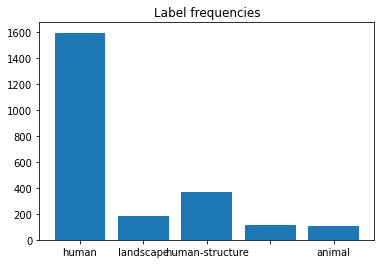

In [ ]:
import matplotlib.pyplot as plt
plt.bar(label_freqs.keys(), label_freqs.values()) # We pass our labels and values to matplotlib
plt.title('Label frequencies') # add a title to the plot
plt.show() # show the plot

### What to do with these labels?

This plot helps show the balance between the different labels, including some photos which have no labels (this is the bar with no label). This dataset poses a few new challenges for us. Firstly we might be concerned that the model will become much better at predicting humans in comparison to the other labels, since there many more examples of that for the model to learn from. Another challenge is how to evaluate the success of this model, or which metric should we use?

### Choosing a metric  

In our previous ad classification dataset `accuracy` was used as a measure. Accuracy can be shown as 

$$Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$$

Accuracy, is an intuitive metric, since it shows the proportion of correct predictions compared to the total number of predictions. For this reason it often a useful first metric to consider. However there are limitations to using accuracy. In our previous dataset we had two classes with a balance between labels[^4] with the same number of example for each label i.e 50% ads with images 50% ads with no image. In this example we could reasonably say then that if you predicted randomly, you would have an accuracy of around 50%. However if the dataset is not evenly balanced between labels, this is no longer true. 

As an extreme example, take a hypothetical dataset with a 100 data points, with label $A$ for 99 and label $B$ for 1. For this dataset always predicting label $A$ would result in an accuracy of 99% ($99/100$). An accuracy metric in this example is not very useful since our model isn't at all good at predicting label $B$, yet we still get an accuracy of 99% which sounds very good. Depending on the labels you are interested in, it is possible that they will be relatively 'rare' in your dataset. It is therefore important to be aware of the limitations of using accuracy as a metric for all datasets. Fortunately, there are other metrics which can help overcome this potential limitation of using accuracy. 

### F-Beta 

The issues we identified with accuracy as a metric, was that it could hide how well a model is performing for imbalanced datasets, in particular it doesn't provide information on two particular things we might care about, precision and recall. 

Precision is the ratio of correct positive predictions to the total number of positive predictions, which can be shown as

$$Precision = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

Recall is the ratio of correct positive predictions to the total number of positive examples in the dataset, which can be shown as

$$recall = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

As you may have noticed, precision is a measure of how precisely a model is i.e. it 'penalized' for making extra wrong guesses. On the other hand recall measures how much a model misses i.e. it is 'penalized' for missing labels. How much we care about each of these depends on our data and how we want to use the model. We can see how in some settings we may care more about recall than precision and having these two measures available allows us to favor one or the other. If we care about some compromise between the two i.e. a model that makes too many wrong guesses or misses to many things, we could use F-Beta measure (sometimes shown as $F\beta$). The F-Beta score is the weighted [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of precision and recall. The best possible F-beta score is 1, the worse 0. The Beta part of Beta is a weighting which can be used to give more weight to precision or recall. A Beta value <1 will give more weight to precision, whilst a weighting > 1 will give more weight to recall. An even weighting of these two is often used i.e. a Beta of 1. This score is often also referred to as the "F-score" or "F-measure". This is the measure we will use for our new dataset.


<div class="alert alert-warning">
Remember, metrics don't directly impact the training process. The metric gives the human training the model feedback on how well it is doing but isn't used by the model to update the model weights. 
</div>

## Loading data 

Now that we have a better understanding of the data, we'll move to the next step, loading the data in a form that a deep learning model (in this case a computer vision model) can understand. fastai provides a number of useful APIs for loading data. These APIs move from a 'high' level API which provides useful 'factory methods', to a 'mid-level' and 'low-level' APIs which offer more flexibility in how data is loaded. 

For our last dataset we loaded our data from a `csv` file using the `.from_csv()` method. Since we have our data loaded into a pandas `DataFrame` we'll instead use this `DataFrame` to load our data. We can remind ourselves of the column names by accessing the `columns` attribute of a DataFrame

In [ ]:
df.columns

Index(['file', 'label'], dtype='object')

The code for loading from a `DataFrame` is fairly similar to the method we looked at before. There are a few additional things we need to specify to load this data. The code is commented to show what each line does.

In [ ]:
photo_data = ImageDataLoaders.from_df( 
    df, # the dataframe where our labels and image file paths are stored
    folder="photo_data/images", # the path to the directory holding the images
    bs=32, # the batch size (number of images + labels)
    label_delim="|", # the deliminator between each label in our label column
    item_tfms=Resize(224), # resize each image to 224x224 
    valid_pct=0.3, # use 30% of the data as validation data
    seed=42, # set a seed to make results more reproducible 
)

### fastai DataLoaders

We have created a new variable using a method from `ImageDataLoaders`, lets see what this is. 

In [ ]:
photo_data

The `ImageDataLoaders.from_df` method produces something called `DataLoaders`. `DataLoaders` are the way in which fastai prepares our input data and labels to a form that can be used as input for a computer vision model. It's beyond the scope to fully explore everything this does under the hood but we will have a look at a few of the most important things it does in this section. 

#### Viewing our data
We have already seen an example of `show_batch`, this method will allow you to preview some of your data and labels. We can pass a `figsize` to control how large our displayed images are. 

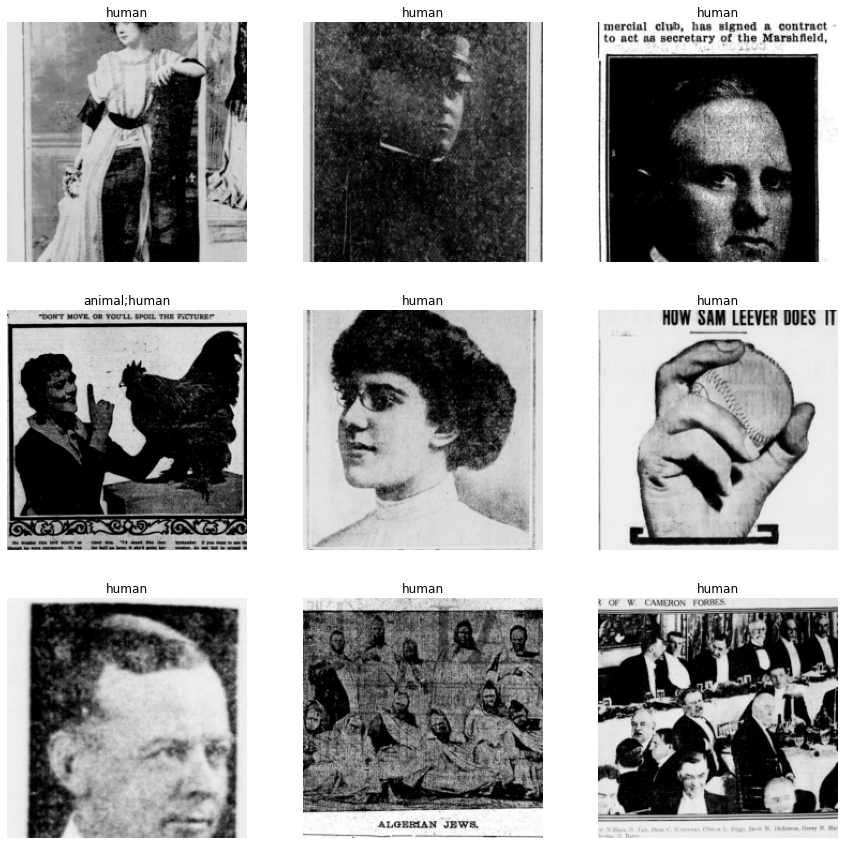

In [ ]:
photo_data.show_batch(figsize=(15,15))

### Inspecting model inputs

Our model takes labels and data as inputs. To help us understand some more of the details of the deep learning pipeline we can inspect these both in more details. We can access the `vocab` attribute of our data to see which labels our data contains. 

In [ ]:
photo_data.vocab

(#4) ['animal','human','human-structure','landscape']

We can see here that we have the four labels we expect. As was mentioned previously machines use the underlying numerical representation of images, rather than 'seeing' images in the same way as a human. We also saw in the outline of the training process that model training usually happens in `batches`. When `photo_data` was created above `bs=32` was specified. We can access a single batch in fastai using `one_batch()`. We'll use this to inspect what the model gets as input. 

Since our data is made up of two parts; the input images, and the labels, `one_batch()` will return two things. We will store these in two variables `x` and `y`

In [ ]:
x, y = photo_data.one_batch()

<div class="alert alert-warning">
    When you learned Python, you were likely told to use meaningful variable names. 'x' and 'y' variable names seem to be the opposite of this. This is usually a very sensible approach, however, within particular disciplines standard conventions are adopted. In machine learning 'x' is commonly understood as the input data and 'y' the target labels to be predicted.
</div>

We can start by checking what `type` x and y are. We can do this using the Python `type()` function. 

In [ ]:
type(x), type(y)

(fastai.torch_core.TensorImage, fastai.torch_core.TensorMultiCategory)

These types will likely not be ones you have seen before since these are specific to the `fastai`,  but we can see that x is a `TensorImage` and y is `TensorMultiCategory`. As a reminder a "Tensor" is a n-dimensional array, in this example one for storing images and one for storing multiple labels. We can explore these in more detail to inspect what both of these `Tensors` look like in this example. To start we can take a look at the length of both x and y:

In [ ]:
len(x), len(y)

(32, 32)

If you remember, back to how we loaded our data, we defined a batch size of 32, so this length represents all of the items in one batch.  Let's take a look at a single example from that batch. We can use the standard python indexing to the access the first element of `x`

In [ ]:
x[0]

tensor([[[0.9765, 0.9765, 0.9765,  ..., 0.9725, 0.9725, 0.9725],
         [0.9804, 0.9765, 0.9765,  ..., 0.9725, 0.9725, 0.9765],
         [0.9765, 0.9765, 0.9804,  ..., 0.9725, 0.9725, 0.9725],
         ...,
         [0.9647, 0.9569, 0.8588,  ..., 0.9647, 0.9608, 0.9647],
         [0.9608, 0.9490, 0.8510,  ..., 0.9647, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.8824,  ..., 0.9647, 0.9686, 0.9686]],

        [[0.9765, 0.9765, 0.9765,  ..., 0.9725, 0.9725, 0.9725],
         [0.9804, 0.9765, 0.9765,  ..., 0.9725, 0.9725, 0.9765],
         [0.9765, 0.9765, 0.9804,  ..., 0.9725, 0.9725, 0.9725],
         ...,
         [0.9647, 0.9569, 0.8588,  ..., 0.9647, 0.9608, 0.9647],
         [0.9608, 0.9490, 0.8510,  ..., 0.9647, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.8824,  ..., 0.9647, 0.9686, 0.9686]],

        [[0.9765, 0.9765, 0.9765,  ..., 0.9725, 0.9725, 0.9725],
         [0.9804, 0.9765, 0.9765,  ..., 0.9725, 0.9725, 0.9765],
         [0.9765, 0.9765, 0.9804,  ..., 0.9725, 0.9725, 0.

Although it isn't clear from looking at this output this is the first image in our batch in the format in which it will be passed to the model. Since this output isn't very meaningful for us to interpret lets access the `shape` attribute:

In [ ]:
x[0].shape

torch.Size([3, 224, 224])

This output is hopefully more meaningful. The first dimension `3` refers to the number of channels in our image (since the image is an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image), the other dimensions `224` are the size we specified when we loaded our data `item_tfms=Resize(224)`. Now we have inspected `x`, the input images, we'll take a look at the a `y`. Again we can index into the first `y`

In [ ]:
y[0]

tensor([0., 1., 0., 0.])

Again we can see that the first `y` is also a tensor. However, this tensor looks different from our image example. Here we can easily manually count the number of elements, however, to be sure lets access the `shape` attribute:

In [ ]:
y[0].shape

torch.Size([4])

So we have four elements in our first `y`. These are 'one hot encoded' versions of our labels. 'One hot encoding' is a way of expressing label where `0` is no label and `1` is true. So in this case we have one the four labels in the vocab present in the label for the first image. Now we can finally take a look at the first batch as a whole

In [ ]:
x.shape, y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 4]))

Again, this can be useful to verify that data looks as you would expect. It is also a useful way of 'poking' around to see how data is prepared for the model. Now we have had a look at what our data looks like, we'll look at some potential ways to maximize our fairly modest dataset. 

## Image Augmentations 


Image augmentations are one of the methods we can use to try to reduce the amount of training data required and prevent overfitting our model. As a reminder overfitting occurs when the model gets very good at predicting on the training data but doesn't generalise well to the validation data. Image augmentations are a method of artificially creating more training data. Looking at an example will should help illustrate how this works.

In [ ]:
tfms = aug_transforms()
photo_data = ImageDataLoaders.from_df(
    df,
    folder="photo_data/images",
    bs=32,
    label_delim="|",
    item_tfms=Resize(224),
    batch_tfms=[*tfms],
    valid_pct=0.3,
    seed=42,
)

In this example we keep everything the same as before except we now add a function `aug_transforms` to create some image transformations. We pass this into the `batch_tfms` parameter in the `ImageDataLoader`. We previously saw `item_tfms` in our advert data loading example. What is the difference between these two transforms? `item_tfms` as the name might suggests, are applied to each item before they are assembled into a batch. `batch_tfms` are instead applied to batches of images, in our case 32 images at a time. The reason we should try and use `batch_tfms` when possible, is that they happen on the GPU and as a result our much faster. If you don't have a GPU available they will still work though. 

Now we have passed some augmentations to our data, we should take a look at what the data looks like. Since we are now concerned with what the transformation look like, it will be easier to compare if we look at the same image. We can do this by passing the `unique=True` flag to `show_batch()`

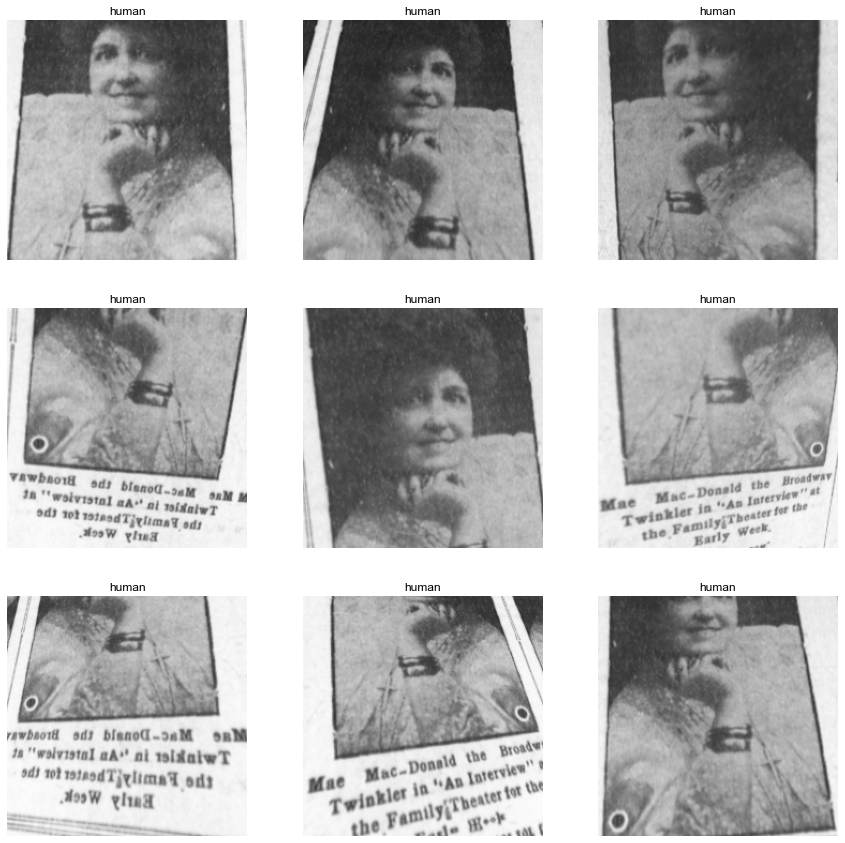

In [ ]:
photo_data.show_batch(unique=True, figsize=(15,15))

We can see that the same image has been manipulated in a variety of ways, including zooms and rotations. Why would we want to do this? If we look at the images we see that they all look a little bit different, however, we also see that they have the same label. Image transforms or `augmentations` are useful because they allow us to artificially increase the size of our training data. For the model the transformed images all represent new training examples but we didn't have to actually label all of these different examples. The catch is that we usually want to try and use transformations that are actually likely to represent real variations in the types of data our model will work with. The default transformations may not match with the actual variation seen in new data. For example a standard transform is to mimic variations in lighting in an image. These are often there because the input data is assumed to be photographs taken 'in the wild', and therefore the data to be predicted on will have variation in lighting. We want to be aware of this and will often want to modify or create our own transformations to match our data. We don't have space in this lesson to fully explore this but you can find a notebook exploring this in more detail here !todo add link. For now we'll stick to the default transforms created by `aug_transforms`

## Creating a model

Now we have loaded data, including applying some augmentations to the images, we are ready to create our model. Again we have seen this before and most things will remain the same as in our previous advert example. We again use `ccn_learner` to create a model. We now know that the "cnn" refers to a type of deep learning model. We again pass our data in, and an existing model architecture we want to use. This time we use a "DenseNet" model architecture instead of the "ResNet" model which was used in our previous example. This is done to show how easily we can experiment with the different model architectures supported by fastai. Although "ResNets" are good starting point you should feel free to also experiment with other models. We again pass in some `metrics`, we use `F1ScoreMulti` since we want to use F1 as a metric on a dataset with multiple labels. We also pass in `accuracy_multi` this is a multi-label version of accuracy. We include this to illustrate how different metrics can give very different scores for the performance of our model. 

In [ ]:
learn = cnn_learner(photo_data, densenet121, metrics=[F1ScoreMulti(), accuracy_multi])

<div class="alert alert-warning">
You may have spotted that F1ScoreMulti() has a brackets at the end. This is because this particular metrics is a class that needs to be instantiated before it can be used. Some other metrics in the fastai library will need to be instantiated before they can be used. It is usually possible to spot these because they are in CamelCase as opposed to snake_case. 
</div>

Now we have created our model, lets look again what `learn`, this time we'll a nice features of Jupyter notebooks 

In [ ]:
?learn

Signature:      learn(event_name)
Type:           Learner
String form:    <fastai.learner.Learner object at 0x125147fd0>
File:           /usr/local/anaconda3/envs/ph-deep-learning/lib/python3.8/site-packages/fastai/learner.py
Docstring:      Group together a `model`, some `dls` and a `loss_func` to handle training
Call docstring: Call `event_name` for all `Callback`s in `self.cbs`


In a notebook `?` in front of a library, method or variable will return the `Docstring`. This can be a useful way of accessing documentation. In this example we see that a learner groups or model, our data `dls` and a "loss function". Helpfully, fastai will often infer a suitable `loss_func` based on the data it is passed. 

## Training the model

The fastai `learner` contains some powerful functionalities to help train your model. One of these is the learning rate finder. As a reminder a learning rate determines how aggressively we update our model after each batch. If the learning rate is too low the model will only improve very slowly, if the learning rate is too high the loss of the model will go up i.e. the model will get worse rather than better. fastai includes a method `lr_find` which helps with this process. Running this method will start a progress bar before showing a plot.

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=7.585775847473997e-07)

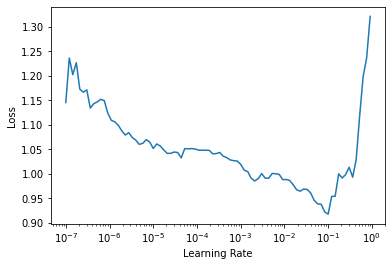

In [ ]:
learn.lr_find()

`lr_find` helps find a suitable learning rate training on a "mini batch", and slowly increasing the learning rate until the loss starts to get much worse. We can see in this graph that on the y-axis we have the `loss` and on the x-axis `Learning Rate`. The loss moves down as the learning rate up to a point before it shoots up. We want to pick a point where the loss is going down steeply, since this should be a learning rate which will allow our model to update quickly whilst avoiding the point where the loss shoots up. In this case we'll pick `2e-2`. Picking a good learning rate is one of the important variables that you should try and control in the training pipeline. A useful exercise is to try out a range of different learning rates with the same model and data to see how it impacts the training of the model. 

### Fitting the model 

We are ready to train our model. We previously used the `fine_tune` method to train our model, but we can also use other methods to train our model. In this example we will use a method called [`fit_one_cycle`](https://docs.fast.ai/callback.schedule#Learner.fit_one_cycle). This method implements an approach to training described in a [research paper](https://arxiv.org/pdf/1708.07120.pdf) that was found to improve how quickly a model trains. The fastai library implements many best practices in a way that makes them easy to use. For now we'll train the model for 5 epochs using a learning rate 2e-2

In [ ]:
learn.fit_one_cycle(5, lr_max=2e-2)

Most of this output is similar to the output we got when training our previous model. One different you notice is that this time we only get one set of outputs, rather than the two we had in the ads example. This is because we are no longer unfreezing the model during the training step, and our only training the last layers of the model. The other layers of the model are using the weights learned from training on ImageNet. 

Another difference is that now we have two different metrics; `f1_score` and `accuracy_multi`. The potential limitations of accuracy are made clearer in this example. If we took used accuracy as our measure here we could mistakenly think our model is doing much better than is reflected by the F1-Score. 

We also get an output for `train_loss` and `valid_loss`. As we have seen a deep learning model has some way of calculating how wrong it is, using [loss function](https://en.wikipedia.org/wiki/Loss_function). The 'train' and 'valid' refer to the loss for the training and validation data. It can be useful to see the loss for both of these to see how whether our model performs very differently on the training data in compared to the validation data. Although the loss values can be tricky to directly interpret we can use the change of these values to see whether our model is improving (we would expect loss to go down when the model is improving). Compared to our previous model we are not getting a very good score, we can see if "unfreezing" the model (updating the lower layers of the network) helps improve the performance of our model. 

### Saving progress

Since training a deep learning model takes time and resources it often useful to save progress as we train our model. This is particularly useful since it is possible to overfit a model, or do something else which makes it perform more poorly than previous epochs. Saving allows us to go back if we mess something up later on. To save the model we can use the `save` method and pass in a `string` value to name this save point. 

In [ ]:
learn.save('stage_1')

Now that our progress so far has been saved, we can see if training the lower layers of the network improves our model. We can unfreeze a model by using the `unfreeze` method on our `learner`. 

SuggestedLRs(lr_min=6.918309736647643e-07, lr_steep=4.786300905834651e-06)

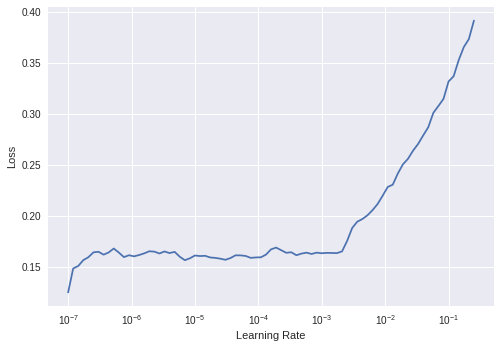

In [ ]:
learn.unfreeze()

Calling this method will 'unfreeze' our model. This means that the lower layers of the model will now be updated during training. It is often useful to run `lr_find` again when a model has been unfrozen since the appropriate learning rate will usually be different. 

In [ ]:
learn.lr_find()

The learning rate plot looks different this time with a flattish loss before the loss shoots up. Interpreting a `lr_find` plots is not always straight-forward, especially for a model that has been unfrozen. Usually the best learning rate for a unfrozen model will be smaller than one used for the frozen model at the start of training. Another useful trick is that we don't just have to pick one learning rate. fastai provides support for 'differential learning rates', which apply different learning rates to different layers of the network. When looking at transfer learning, we saw that the lower layers of a network often learn 'fundamental' visual features, whilst later layers are more tasks specific. As a result we may not want to update our model with a single learning rate since we want the lower layers of the network to be updated more slowly than the end layers. A simple way of using different learning rates is to use the Python `slice` function. In this case we'll try and pick a learning rate range where the model hasn't shot up yet. 

We have already seen how we can save a model that we have already trained, another way to save the model is to use a 'callback'. [Callbacks](https://en.wikipedia.org/wiki/Callback_(computer_programming) are sometimes used in programming to modify or change the behavior of some code. fastai includes a callback `SaveModelCallback` which as the name suggests, will save the model. By default it will save the best performing model during your training loop and load it at the end, we can also pass in the thing we want fastai to monitor to see things are improving. In this example we'll pass in `f1_score` since this is the metric we are trying to improve. 

Lets now train the model for a few more epochs

In [ ]:
learn.fit_one_cycle(4, lr_max=slice(6e-6, 4e-4), cbs=[SaveModelCallback(monitor='f1_score')])

epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.178716,0.199612,0.658940,0.921667,01:30
1,0.164591,0.193451,0.658547,0.922500,01:29
2,0.164867,0.190896,0.680938,0.927917,01:29
3,0.160693,0.191802,0.676866,0.925417,01:43


Better model found at epoch 0 with f1_score value: 0.6589398317851576.
Better model found at epoch 2 with f1_score value: 0.6809378327654568.


# Investigating the results of our model 

We seem to have not got a super well performing model in this example. We shouldn't give up at this point, just as we explored the data before we created our model, we will often need to explore the results of the model too. In this last section of our training loop we'll explore some of the characteristics of our model results. 

So far, we have used the metrics printed out during the training loop. We may want to directly work with the predictions from the model. We can call `get_preds`. This is a method that runs our model in 'inference' mode i.e. to make new predictions. We can also use this method to run predictions on new data. !todo add link to inference notebook example

By default return the results of our model on our validation data. We also get back the correct labels. We'll store these values in `y_pred` and `y_true`. Again we use the common place `x` and `y` notations for data (x) and labels (y), in this case since we are working with two types of labels we'll store them predicted and true i.e. one is our predicted value, whilst the other is the correct label. 

In [ ]:
y_pred, y_true = learn.get_preds()

Again, we can explore some properties of both of these variables to get a better sense of what they are. 

In [ ]:
len(y_pred), len(y_true)

(600, 600)

Both `y_pred` and `y_true` have a length of 600. This is the validation part of our dataset, so this is what we'd expect since that is 30% of our total dataset size (2002) rows in our `DataFrame`. Let's index into one example of `y_pred`. 

In [ ]:
y_pred[0]

tensor([0.1082, 0.0075, 0.5191, 0.7267])

What does this represent? Firstly we have four values, which represent each of the potential labels in our dataset. Each of these is a probability for a particular label. Since we can have multiple labels for each image (or none) these probabilities could be high or low for multiple labels. For a classification problem where there are clear categories, having a single class prediction is a useful feature of a model, however if we have a set of labels or data, which contain more ambiguity then having the possibility to 'tune' the threshold of probability at which we assign a label could be very helpful. For example we only use predictions for a label if a model is >80% certain of a possible label. There is also the possibility of trying to work directly with the predicted label probabilities, rather than converting them to labels. 

Now we have a set of predictions and actual labels we could directly explore these using other tools. In this example we'll use [scikit-learn](https://scikit-learn.org/stable/), a python library for machine learning. In particular we will use the metrics module to look at our results.

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

These imported metrics should look familiar from the section of the lesson where metrics were discussed. These metrics are functions to which we can pass in our predictions and true labels. We also pass in an `average`, which determines how our labels are averaged, this can give us more control over how the score is calculated. In this case we use macro which "Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account."(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). 

In [ ]:
f1_score(y_true, y_pred>0.50, average='macro')

0.6809378327654568

Although it could be useful to calculate different scores for our total dataset, it would be useful to have more granularity for how our model is performing. For this we can use `classification_report` from scikit-learn. 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, y_pred>0.50, target_names=photo_data.vocab, zero_division=1))

                 precision    recall  f1-score   support

         animal       0.82      0.29      0.43        31
          human       0.93      0.94      0.94       481
human-structure       0.75      0.76      0.76       104
      landscape       0.67      0.55      0.60        51

      micro avg       0.88      0.85      0.87       667
      macro avg       0.79      0.64      0.68       667
   weighted avg       0.88      0.85      0.86       667
    samples avg       0.88      0.86      0.86       667



We can now see a much more detailed picture of how our model is doing. We now have 'precision', 'recall' and 'f1-score' broken down per label. We also have something called 'support' which refers to the number of examples of this label in the dataset. 

We can see from these results that some of our labels are performing better than others. The model does particularly well on the 'human', and particularly badly, on the 'animal' labels. If we look at the support for each of these we can see there are many more examples to learn from for the 'human' label (481), compared to the 'animal' label (31). This may explain some of the difference in performance of the model but it is also important to consider the labels themselves. 

#### The visual characteristics of our labels 
For most people it will clear what is mean when the concept 'animal' is referred to. There may be differences in the specific interpretation of the concept but it will be possible for most people to see an image of something and say whether it is an animal or not. However, although it is clear what we mean by animal, this concept includes things with very different visual characteristics. In this dataset it includes horses, dogs, cats, and pigs, all of which look quite different from one another. So when we ask a model to predict a label for 'animal' we are actually asking it to predict a range of visually fairly distinct things. This is not to say that a computer vision model couldn't be trained to recognize to recognize 'animals' by seeing examples of different specific types of animals, however in our particular dataset, this might be more difficult for a model to learn given  the number and variety of examples it has to learn from. 

If we are trying to use computer vision as a tool for humanities research it is important to consider how the concepts we may wish to work with are represented visually in our dataset. In comparison to the label 'animal' which mostly an easy for the human annotator of this dataset to identify, the label 'landscape' was more difficult at times. This was largely because the concept which this label was trying to capture wasn't well defined at the start of the annotation process. Did it refer to depictions of specific types of natural scene, or did it refer to a particular framing or style of photography? Although it is not possible to say that this difficulty in labeling this label in the dataset directly translated into the model performing more poorly, it might point to the need to either more tightly define what is and isn't meant by this label, or to choose a new label that more closely relates to the concept you might be trying to get your model to predict. 

## A more realistic training loop?

<img src="figs_deeplearning/feedback-loop.png"> 

When we introduced a deep learning pipeline, it was shown as a very linear process moving from one stage to the next. In reality it is likely to be a much more iterative process. This will be particularly true if new annotations are being created, since choices will need to be made about what labels are chosen, and whether these labels are intended to be used to classify or label images.  The process of annotating new data will expose you more deeply to the source material, which may flag that some labels are poorly defined and don't sufficiently capture the visual properties that you are trying to capture. It may also flag that some of your labels appear rarely making it more challenging to train a model to predict these labels.[^6] 

# Discussion 
Framing in a historical research/humanities context

- other things besides classification/labelling, clustering, similarity, visual search
- generalisability 
- Choosing meaningful labels 
- deep learning as a tool vs something underpinning research claims 
- interprability 
- bias
- pre-trained models vs over-fitting to your task/corpus 

## Learning more and next steps

This lesson has attempted to cover quite a lot, but many topics have either not been covered at all, or have only been covered briefly. This section suggests; some useful sources for further learning, some topics which have not been fully addressed in this tutorial and which would be useful to explore further, and some other tools that might be useful. 

### Resources

- [fast.ai](https://www.fast.ai/) has a range of resources including free online courses covering [deep learning](https://course.fast.ai/), [natural language processing](https://www.fast.ai/2019/07/08/fastai-nlp/), and [ethics](https://ethics.fast.ai/), a [book](https://www.oreilly.com/library/view/deep-learning-for/9781492045519/), and a [discussion forum](https://forums.fast.ai/). These courses have the aim of making deep learning accessible but do dive into important details. The 'top down' approach to learning in this lesson was inspired by the approach taken in the fastai courses. 

- There are many deep learning courses available online, including many which share videos and course materials from undergraduate and graduate university courses. 

- *The Hundred-Page Machine Learning Book*, Andriy Burkov (2019), provides a concise overview of important topics across both 'traditional' and deep learning based approaches to machine learning.

- There are a range of initiatives related to the use of machine learning in libraries, or with cultural heritage materials. This includes:
    - [ai4lam](https://sites.google.com/view/ai4lam) "an international, participatory community focused on advancing the use of artificial intelligence in, for and by libraries, archives and museums", 
    - *[Machine Learning + Libraries: A Report on the State of the Field](https://blogs.loc.gov/thesignal/2020/07/machine-learning-libraries-a-report-on-the-state-of-the-field/), Ryan Cordell (2020),* a report commissioned by the Library of Congress Labs,
    - Responsible Operations: Data Science, Machine Learning, and AI in Libraries. Padilla, Thomas. 2019. OCLC Research. [https://doi.org/10.25333/xk7z-9g97.]()

- [3Blue1Brown](https://www.youtube.com/c/3blue1brown/about) a Youtube channel by Grant Sanderson covers topics related to machine learning. The channel aims to make the mathematical concepts more easily understood through the use of animations. This may be a particular useful resource for developing some intuitions about the maths underpinning deep learning and machine learning for those who are less familiar or comfortable with the notion used in some resources. 

- We plan to 'extend' this lesson further with additional notebook based tutorials on specific techniques, or concepts. In particular notebooks already exist covering the annotation, and inference steps of a deep learning pipeline in some more detail. These notebooks will be hosted at !todo add repo link 

### Suggested topics for further learning  

- Ethics and power have only been briefly briefly discussed. Ethical issues related to machine learning is an active area of discussion both inside and outside of academia. Although the issues will be slightly different when working with historical images, ethical considerations do not disappear.
- Loss and gradient descent: This lesson didn't have space to go into detail about either the specifics of the loss functions used in both of our models, or the details of how model weights are updated based on the loss. Both of these concepts are discussed in many of the resources above. A useful overview can also be found in a [3Blue1Brown](https://www.youtube.com/c/3blue1brown/about) YouTube [video](https://youtu.be/IHZwWFHWa-w)
- Though the layers of a CNN were discussed in this lesson, we didn't exactly what each of these layers consists of, in particular understanding the 'convolution' part of CNNs will be helpful. 
- fastai and Pytorch: we only scratched the surface of these libraries in this lesson, it may be particularly useful to look at fastai's [data BLock api](https://docs.fast.ai/tutorial.datablock) and [callbacks](https://docs.fast.ai/callback.core). 

### Tools and software libraries

- [LabelStudio](https://labelstud.io/) was used to create the annotated data used in this lesson, and is relatively simple to use for a range of annotation tasks. You can see how the annotations for this project where setup at !todo link There are plenty of other annotations tools available. 
- [Distant Viewing Toolkit](https://github.com/distant-viewing/dvt)  is a "Python package designed to facilitate the computational analysis of visual culture"
- [PixPlot](https://github.com/YaleDHLab/pix-plot) is a tool to visualize image collections based on image similarity. 


### Access to a GPU 

Although it is possible to train deep learning models without a GPU, it will be a much slower experience and may be impractical for working with larger datasets, or bigger images. For a more detailed explanation of why this is, a [response](https://qr.ae/pNCu83) to a question on Quora might be helpful. The majority of deep learning libraries are intended to be run on GPU's made by [Nvidia](https://en.wikipedia.org/wiki/Nvidia). Whilst one option to getting access to a GPU is to build or buy a PC with a graphics card, the setup process can be complicated and expensive.Using a cloud platform will usually be a better starting point. At the time of creating this lesson [Google Colab](https://colab.research.google.com/), [Kaggle](https://www.kaggle.com/dansbecker/running-kaggle-kernels-with-a-gpu), and [Paperspace](https://www.paperspace.com/) all provide access to a limited amount of free GPU access. These options may change in the future, a good place to get up-to-date information on options for GPU access may be found on the fastai [forums](https://forums.fast.ai/) 

# Footnotes

[^1]: This is clearly a claim that could be challenged but there is almost always a level of abstraction at which we choose to 'stop' trying to understand all the details. For example, as a user of the Python programming language we may not dig into how Python itself is implemented in the C programming language. If we use deep learning as a 'tool' we want to be sure of how 'correct' our results are, not necessarily exactly why they are correct. 

[^2]: Not a rigours test 

[^3]: This initialisation isn't actually random in the fastai framework, and instead uses [Kaiming initialization](https://pouannes.github.io/blog/initialization/). <!---$std = \sqrt{\frac{2}{\left(1 + a^{2}  \right ) \times \text{input_dimensions}}}$-->

[^4]: This balanced data was generated by upsampling the minority class. The process for doing this is in !todo add link. Normally you probably wouldn't want to start with this approach but it was done here to make the first example easier to understand. 

[^5]: Neural Networks are able to theoretically approximate any function. The mathematical proof of this exists in a number of forms under the heading of the "Universal Approximation theorem"](https://en.wikipedia.org/wiki/Universal_approximation_theorem). These proofs are not things you will need to know to practically use deep learning, however if you are interested a good overview of the idea can be found in a [youtube video](https://youtu.be/Ijqkc7OLenI)  

[^6]: If you are trying to find a particular type of image which rarely appears in your corpus it may be better to tackle this as an 'image retrieval' problem, more specifically ['content based image retrieval']('https://en.wikipedia.org/wiki/Content-based_image_retrieval)